## Import Library





In [34]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Exploratory Data Analysis (EDA)

In [36]:
path='/content/drive/MyDrive/Churn_Modelling.csv'
df=pd.read_csv(path)
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [37]:
df.shape

(10002, 14)

In [38]:
print('les informmations sur la base de données:')
df.info()

les informmations sur la base de données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [39]:
columns = df.columns.to_list()

for col in columns:
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)

Column: RowNumber
Unique Values: [    1     2     3 ...  9998  9999 10000]
--------------------------------------------------
Column: CustomerId
Unique Values: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
--------------------------------------------------
Column: Surname
Unique Values: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
--------------------------------------------------
Column: CreditScore
Unique Values: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704

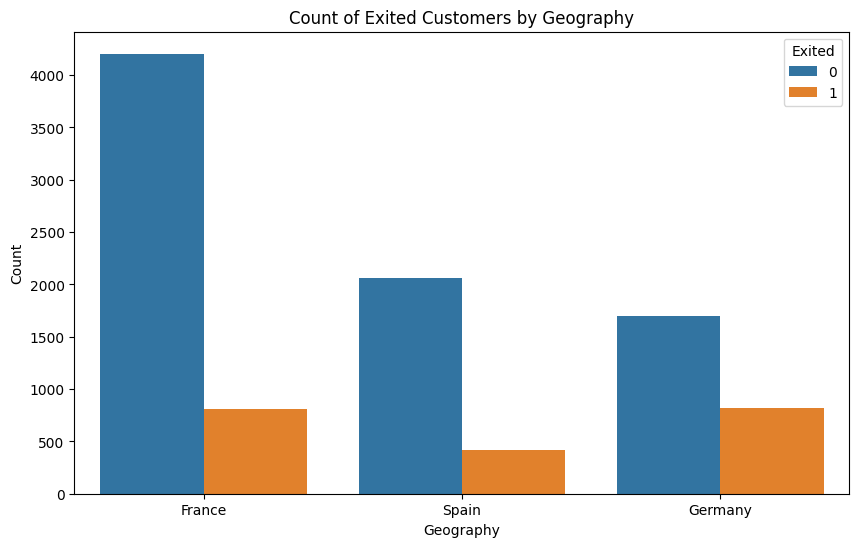

In [40]:
geography_labels = ['France', 'Spain', 'Germany']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.xticks(ticks=[0, 1, 2], labels=geography_labels)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Geography')
plt.show()

Le graphique à barres montre la distribution des clients qui ont quitté l'entreprise (Exited = 1) et de ceux qui sont restés (Exited = 0) en fonction de leur pays (Geography).

France : La France a le plus grand nombre total de clients. Bien que la majorité des clients français soient restés, le nombre de clients qui ont quitté l'entreprise est significativement plus élevé par rapport à l'Espagne et à l'Allemagne.

Espagne : L'Espagne a le plus faible taux de clients qui ont quitté l'entreprise. Le nombre de clients qui sont partis est considérablement plus petit que le nombre de clients qui sont restés.

Allemagne : L'Allemagne a un taux de désabonnement (churn rate) proportionnellement élevé. Bien que le nombre total de clients soit inférieur à celui de la France et de l'Espagne, le nombre de clients qui ont quitté l'entreprise est assez proche de celui de la France, ce qui suggère que les clients allemands sont plus susceptibles de se désabonner.

En résumé, ce graphique indique que le pays d'origine est un facteur important dans la prédiction du désabonnement des clients, avec une forte proportion de départs en Allemagne par rapport au nombre total de clients, et un taux de désabonnement très faible en Espagne.

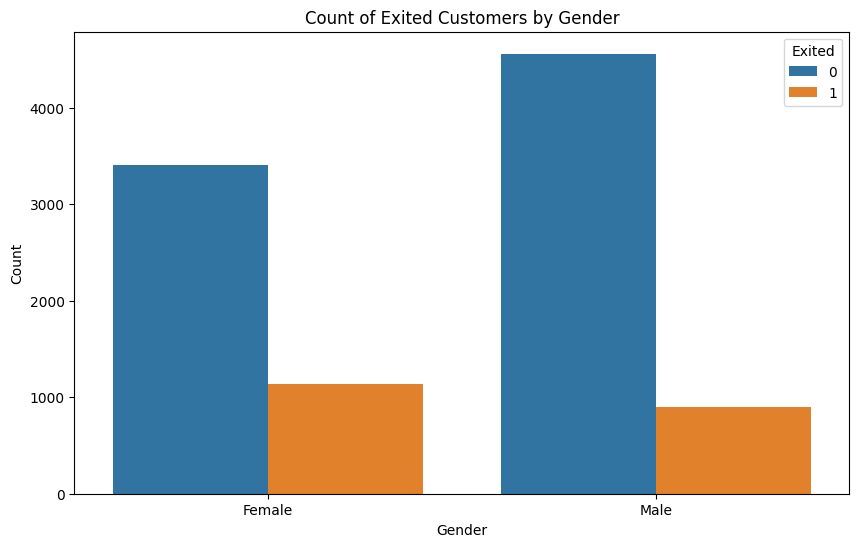

In [41]:
Gender_labels = ['Female', 'Male']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Exited')
plt.xticks(ticks=[0, 1], labels=Gender_labels)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Gender')
plt.show()

Ce graphique à barres présente le nombre de clients qui ont quitté l'entreprise (Exited = 1) et de ceux qui sont restés (Exited = 0) en fonction de leur genre (Gender).

Femmes : Le nombre de clientes est légèrement inférieur à celui des hommes. Cependant, la proportion de clientes qui ont quitté l'entreprise est significativement plus élevée que celle des clients qui sont restés, ce qui suggère un taux de désabonnement plus important chez les femmes.

Hommes : Le nombre total de clients masculins est supérieur à celui des clientes. Bien que le nombre absolu d'hommes ayant quitté l'entreprise soit inférieur à celui des femmes, la proportion par rapport au total des hommes est moins élevée.

En conclusion, ce graphique indique que le genre est un facteur de prédiction du désabonnement, et que les femmes sont plus susceptibles de se désabonner que les hommes.

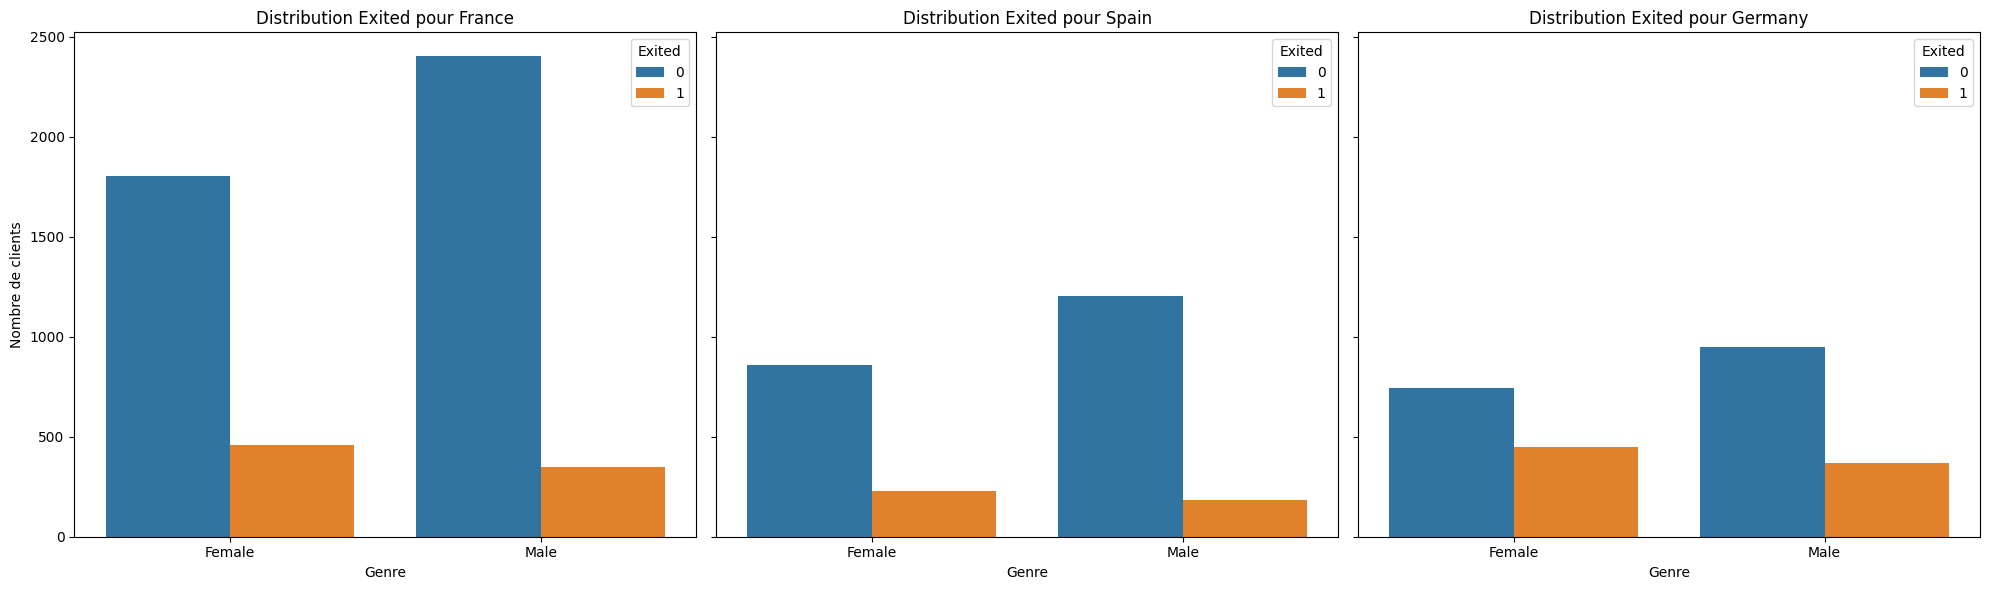

In [43]:
# Liste des pays uniques, en s'assurant qu'il n'y a pas de valeurs nulles
countries = df['Geography'].dropna().unique()

# Création d'une figure avec des sous-graphiques pour chaque pays
fig, axes = plt.subplots(1, len(countries), figsize=(20, 6), sharey=True)

# Boucle sur chaque pays
for i, country in enumerate(countries):
    # Filtrer les données pour le pays actuel
    data_country = df[df['Geography'] == country]

    # Calculer le nombre de clients Exited pour chaque genre dans le pays actuel
    exited_counts = data_country.groupby(['Gender', 'Exited']).size().reset_index(name='Count')

    # Créer le bar plot sur le sous-graphique correspondant
    sns.barplot(data=exited_counts, x='Gender', y='Count', hue='Exited', ax=axes[i])

    # Ajouter le titre du sous-graphique
    axes[i].set_title(f'Distribution Exited pour {country}')
    axes[i].set_ylabel('Nombre de clients')
    axes[i].set_xlabel('Genre')

# Ajuster la disposition pour éviter le chevauchement
plt.tight_layout()
plt.show()

Cette visualisation présente la distribution des clients qui ont quitté l'entreprise (Exited = 1) et ceux qui sont restés (Exited = 0), en les séparant par leur pays (Geography) et leur genre (Gender).

Interprétation

En France : Le taux de désabonnement semble plus élevé chez les femmes que chez les hommes. Bien que le nombre total de clients masculins soit supérieur, la proportion de clientes qui quittent l'entreprise est notablement plus élevée.

En Espagne : Ce pays présente le taux de désabonnement le plus bas, tant chez les hommes que chez les femmes. La grande majorité des clients espagnols restent, indépendamment de leur genre.

En Allemagne : Ce pays affiche un taux de désabonnement élevé par rapport aux autres pays, surtout chez les femmes, où la proportion de départs est la plus forte des trois pays. Les femmes allemandes semblent être les plus susceptibles de se désabonner.

Le genre et la géographie sont des facteurs importants pour prédire le désabonnement des clients. Les femmes en Allemagne présentent un risque de désabonnement particulièrement élevé, tandis que les clients espagnols, quel que soit leur genre, sont les plus fidèles.

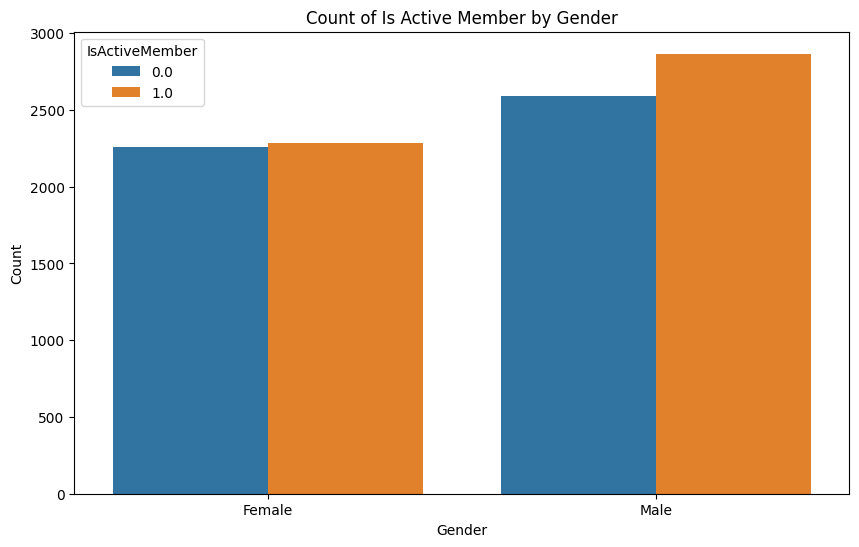

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='IsActiveMember')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Is Active Member by Gender')
plt.show()

Ce graphique à barres montre la distribution des clients actifs (IsActiveMember = 1) et non actifs (IsActiveMember = 0) en fonction de leur genre (Gender).

Femmes : Le nombre de clientes actives est pratiquement identique à celui des clientes non actives. Cela suggère que le taux d'activité des clientes est équilibré.

Hommes : Le nombre d'hommes actifs est légèrement supérieur au nombre d'hommes non actifs. On observe une différence plus marquée chez les hommes, où le nombre de membres actifs est clairement plus élevé.

En résumé, ce graphique indique que le genre n'a pas un impact majeur sur le statut d'activité, mais que les hommes sont légèrement plus susceptibles d'être des membres actifs que les femmes.

##Features Engineering

In [44]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 2


In [45]:
df.drop_duplicates(inplace=True)
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [46]:
df.shape

(10000, 14)

*Afficher les informations sur les valeurs manquantes*

In [47]:
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [48]:
df.isnull().any()


,0
RowNumber,False
CustomerId,False
Surname,False
CreditScore,False
Geography,True
Gender,False
Age,True
Tenure,False
Balance,False
NumOfProducts,False


les données contiennent des informations variées sur les clients, mais certaines colonnes, comme Geography, Age, HasCrCard, et IsActiveMember, ont des valeurs manquantes.

In [49]:
# Remplacer les valeurs manquantes par la valeur la plus fréquente pour certaines colonnes
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)

# Remplacer les valeurs manquantes dans 'Age' par la moyenne de la colonne
df['Age'].fillna(df['Age'].mean(), inplace=True)


/tmp/ipython-input-3281322925.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
/tmp/ipython-input-3281322925.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [50]:
# Vérifier les valeurs manquantes après remplacement
print("\nValeurs Manquantes après le remplacement:")
print(df.isnull().sum())



Valeurs Manquantes après le remplacement:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


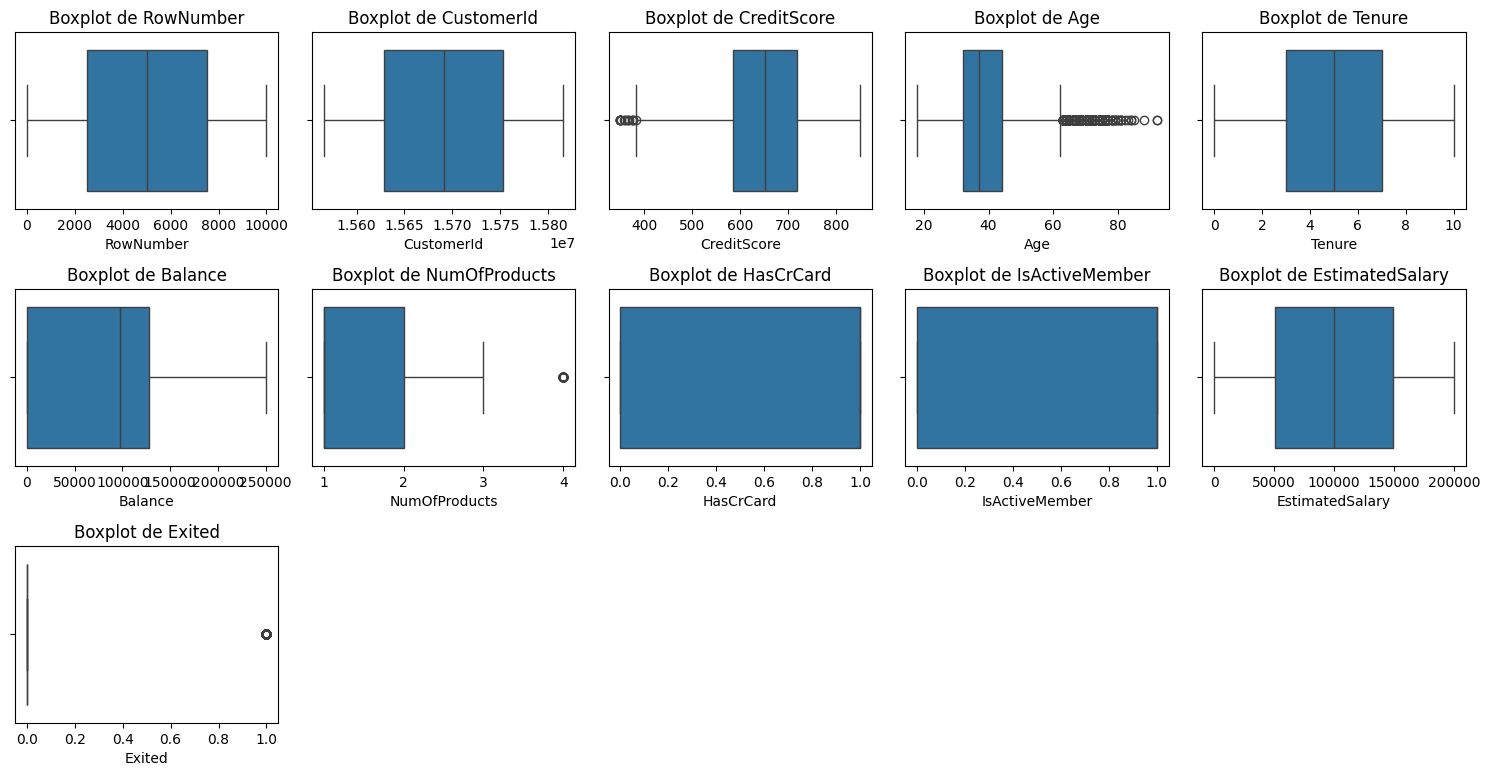

In [51]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot de {column}')
    plt.tight_layout()

plt.show()

RowNumber, CustomerId, NumOfProducts, HasCrCard, IsActiveMember :

Les boxplots de ces colonnes montrent une distribution très concentrée, souvent sans valeurs aberrantes significatives.
HasCrCard et IsActiveMember semblent avoir seulement deux valeurs (probablement binaires, 0 ou 1), ce qui explique l'absence de variance.
CreditScore :

Ce boxplot présente quelques valeurs aberrantes sous forme de points en dehors des moustaches, indiquant des clients avec des scores de crédit exceptionnellement bas ou élevés.
Age :

Il y a une grande concentration de valeurs entre 20 et 60 ans, avec des valeurs aberrantes, notamment des points au-delà de 80 ans. Cela suggère quelques clients beaucoup plus âgés.
Tenure :

Le boxplot est relativement uniforme, avec quelques valeurs aberrantes, ce qui pourrait indiquer des clients ayant des durées d'adhésion très courtes ou longues.
Balance :

La majorité des clients semblent avoir un solde relativement faible, avec des valeurs aberrantes visibles. Cela peut indiquer une petite proportion de clients ayant un solde très élevé.
EstimatedSalary :

La distribution est assez centrée, avec une faible présence de valeurs aberrantes, montrant que la majorité des salaires estimés sont concentrés autour de 50 000 à 100 000.

In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892310e+01,10.487110,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


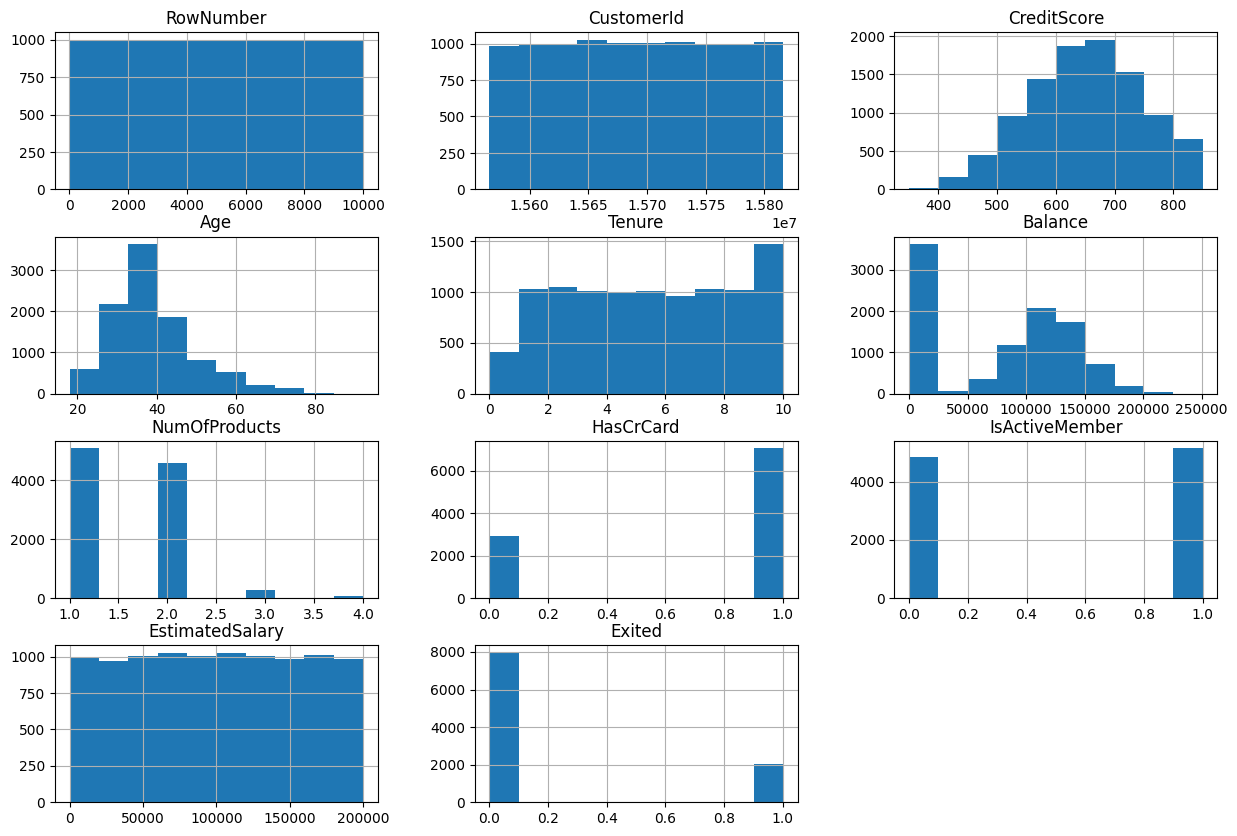

In [53]:
df.hist(figsize=(15, 10))
plt.show()

Observations clés à partir des histogrammes des données :

Deux observations claires ressortent des graphiques d'histogrammes des données :

Colonne 'Balance' : Il y a beaucoup de zéros, ce qui apparaît comme inhabituel. Cela avait déjà été noté lors de l'examen des 10 premières lignes des données. Je vais enquêter davantage pour comprendre pourquoi cela se produit et comment cela se corrèle avec les autres caractéristiques.

Déséquilibre de la colonne 'Exited' : La variable cible, Exited, présente un déséquilibre de classe important. Environ 80% des données représentent des clients qui sont restés (1), tandis que seulement 20% ont quitté (0).

La colonne 'Surname', 'RowNumber' et 'CustomerId' seront supprimées du jeu de données avant la modélisation car elles n'ont pas de potentiel d'utilisation.

In [54]:
# Correct usage of df.drop() for multiple columns:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0


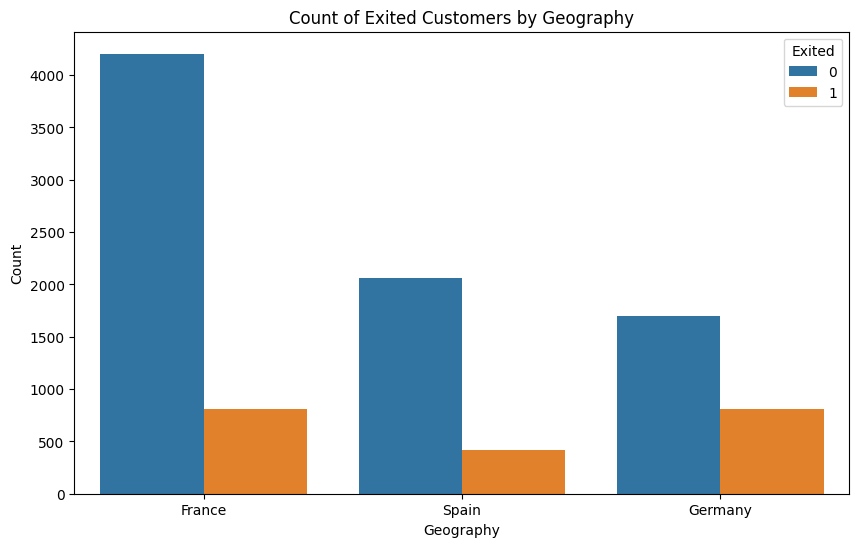

In [55]:
geography_labels = ['France', 'Spain', 'Germany']
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Geography', hue='Exited')
plt.xticks(ticks=[0, 1, 2], labels=geography_labels)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Count of Exited Customers by Geography')
plt.show()

Le countplot de la colonne 'Geography' met en évidence un déséquilibre notable dans la colonne 'Exited' à travers différentes régions. Ce déséquilibre est particulièrement marqué en France et en Espagne, où un nombre important de clients ne sont pas partis, tandis que l'Allemagne montre une distribution légèrement plus équilibrée. Ces différences régionales dans le comportement des clients peuvent fournir des informations précieuses pour le modèle.

In [56]:
zero_balance_df = df[df['Balance'] == 0].groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')
zero_balance_df

,IsActiveMember,Exited,Count
0,0.0,0,1424
1,0.0,1,320
2,1.0,0,1693
3,1.0,1,180


Cela montre un conflit. Comment un membre peut-il quitter tout en restant un membre actif (180 membres) ?

Donc, je vais modifier ces membres pour qu'ils soient considérés comme inactifs.

In [57]:
# change 0 Balance and 1 Exited members IsActiveMember to 0
df.loc[(df['Balance'] == 0) & (df['Exited'] == 1) & (df['IsActiveMember'] == 1), 'IsActiveMember'] = 0

In [58]:
# group df according to NumOfProducts, HasCrCard, IsActiveMember
active_level_df = df.groupby([ 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']).size()
active_level_df

NumOfProducts  HasCrCard  IsActiveMember  Exited
1              0.0        0.0             0          470
                                          1          291
                          1.0             0          618
                                          1          127
               1.0        0.0             0         1127
                                          1          748
                          1.0             0         1460
                                          1          243
2              0.0        0.0             0          567
                                          1           76
                          1.0             0          665
                                          1           36
               1.0        0.0             0         1365
                                          1          167
                          1.0             0         1645
                                          1           69
3              0.0        0.0             0            4
                                          1           45
                          1.0             0            8
                                          1           19
               1.0        0.0             0           14
                                          1          116
                          1.0             0           20
                                          1           40
4              0.0        0.0             1           11
                          1.0             1            8
               1.0        0.0             1           28
                          1.0             1           13
dtype: int64

Il semble étrange que certains clients qui ont quitté la banque soient toujours enregistrés comme membres actifs et détenteurs de cartes de crédit.

Je vais modifier ces clients sortants pour les rendre inactifs et sans carte de crédit.

In [59]:
# change any exited member to IsActiveMember 0 and HasCrCard 0
df.loc[(df['Exited'] == 1) & (df['IsActiveMember'] == 1), 'IsActiveMember'] = 0
df.loc[(df['Exited'] == 1) & (df['HasCrCard'] == 1), 'HasCrCard'] = 0

####Data Preprocessing

Dans cette section, je vais effectuer les tâches suivantes :

Encodage des caractéristiques catégorielles si nécessaire.
Division des données.
Normalisation des caractéristiques pour garantir qu'elles soient sur une échelle similaire.
Étant donné que toutes les caractéristiques catégorielles sont nominales et ne présentent pas d'ordre inhérent, j'utiliserai le One-Hot Encoding pour les traiter de manière appropriée.

In [60]:
cat_cols = ['Geography', 'Gender']
bank_df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=False)

In [61]:
bool_cols = bank_df_encoded.select_dtypes(include=['bool']).columns
bank_df_encoded[bool_cols] = bank_df_encoded[bool_cols].astype(int)

In [62]:
bank_df_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42.0,2,0.00,1,0.0,0.0,101348.88,1,1,0,0,1,0
1,608,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1,1,0
2,502,42.0,8,159660.80,3,0.0,0.0,113931.57,1,1,0,0,1,0
3,699,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0,1,0
4,850,43.0,2,125510.82,1,1.0,1.0,79084.10,0,0,0,1,1,0


#Modeling

In [63]:
X = bank_df_encoded.drop('Exited', axis=1)
y = bank_df_encoded['Exited']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

####Random Forest

In [65]:
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)


RandomForestClassifier(random_state=42)

In [66]:
rf_model_pred = rf.predict(test_X)
print(classification_report(test_y, rf_model_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1593
           1       0.83      0.85      0.84       407

    accuracy                           0.94      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.94      0.94      0.94      2000



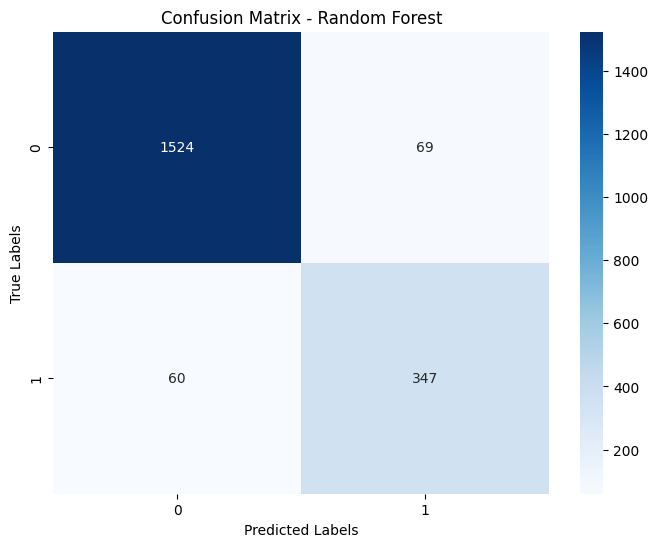

In [67]:
conf_matrix = confusion_matrix(test_y, rf_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###SVM

In [69]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'probability': [True]
}

# Setting up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(train_X, train_y)

print(f"Best parameters: {grid_search.best_params_}")



Best parameters: {'C': 1, 'kernel': 'rbf', 'probability': True}


In [70]:
best_model = grid_search.best_estimator_

svm_model_pred = best_model.predict(test_X)

print("Classification Report:")
print(classification_report(test_y, svm_model_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1593
           1       0.82      0.88      0.85       407

    accuracy                           0.94      2000
   macro avg       0.89      0.92      0.90      2000
weighted avg       0.94      0.94      0.94      2000



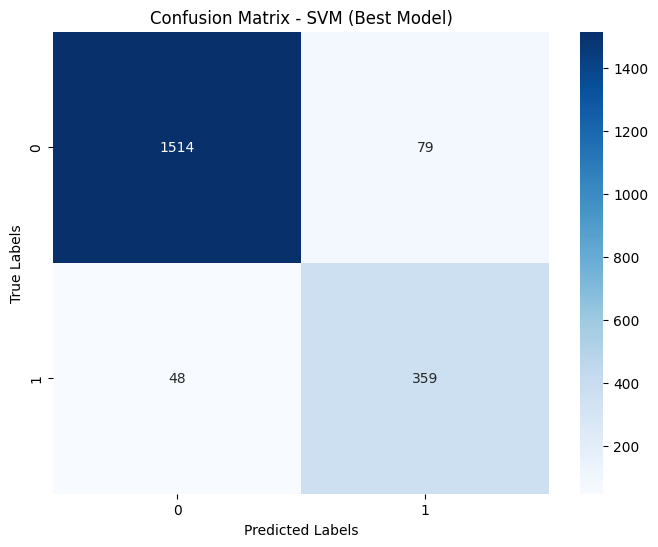

In [71]:
conf_matrix = confusion_matrix(test_y, svm_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix - SVM (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

###Logistic Regression

In [72]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(train_X, train_y)
lr_pred = lr_model.predict(test_X)



In [73]:
print("Logistic Regression Accuracy: ", accuracy_score(test_y, lr_pred))
print("Logistic Regression Classification Report: \n", classification_report(test_y, lr_pred))

Logistic Regression Accuracy:  0.919
Logistic Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1593
           1       0.77      0.86      0.81       407

    accuracy                           0.92      2000
   macro avg       0.87      0.90      0.88      2000
weighted avg       0.92      0.92      0.92      2000



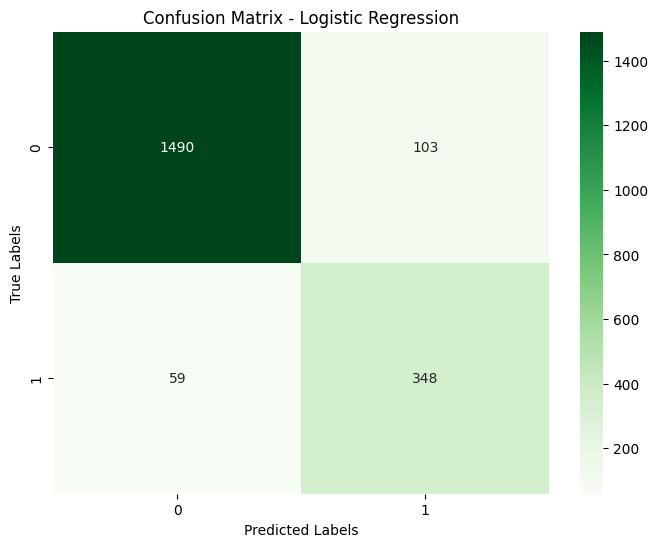

In [74]:
conf_matrix = confusion_matrix(test_y, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

**ROC Curve**

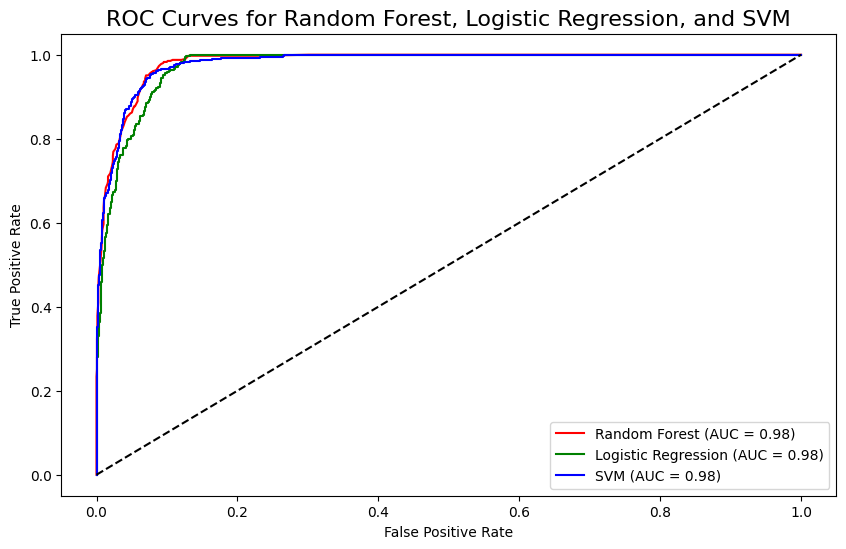

In [75]:
# Random Forest ROC Curve
y_pred_prob_rf = rf.predict_proba(test_X)[:, 1]  # Probabilités de la classe positive pour RF
fpr_rf, tpr_rf, _ = roc_curve(test_y, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Logistic Regression ROC Curve
y_pred_prob_lr = lr_model.predict_proba(test_X)[:, 1]  # Probabilités pour LR
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Récupérer les probabilités pour SVM (en utilisant le meilleur modèle de GridSearchCV)
y_pred_prob_svm = best_model.predict_proba(test_X)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(test_y, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)


# Tracer les courbes ROC pour les trois modèles
plt.figure(figsize=(10, 6))

# Tracer la courbe ROC de Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color="r")

# Tracer la courbe ROC de Logistic Regression
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color="g")

# Tracer la courbe ROC de SVM
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', color="b")

# Ajouter une ligne représentant un classificateur aléatoire
plt.plot([0, 1], [0, 1], 'k--')

# Ajouter des labels et un titre
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest, Logistic Regression, and SVM', fontsize=16)
plt.legend(loc='lower right')

# Afficher le graphique
plt.show()

**Interprétation de la courbe ROC :**

Courbe ROC : Les courbes ROC pour les trois modèles Random Forest, Logistic Regression, et SVM montrent tous des performances élevées avec des valeurs AUC proches de 1.
AUC : L'Aire sous la courbe (AUC) pour chaque modèle est de 0.98, ce qui signifie que chaque modèle a une excellente capacité à distinguer entre les classes positives et négatives. Une AUC de 1 indique une séparation parfaite entre les classes.

Étant donné que les trois modèles ont une AUC de 0.98, leur performance est très similaire en termes de séparation des classes. Il n'y a pas de modèle clairement supérieur sur la base de l'AUC seul.